In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# First, we generate the 1000 binomial draws
n, p, r = 90, 0.265, 1000
bin_draws = st.binom.rvs(n,p, size=r)
pi_draws = bin_draws / n

In [3]:
# Then, use 7.21 to transform them into Normal variates
xi_draws = np.round(2 * np.sqrt(n + 0.5) * \
           np.arcsin(np.sqrt((n * pi_draws + 0.375) / (n + 0.75))), 2)

In [4]:
# Now, verify variance and approximate normality
# We start verifying that the variance is very close to 1.
xi_draws.var()

1.0090086315999998

(array([  1.,  10.,  26., 108., 153., 262., 250., 125.,  39.,  26.]),
 array([-3.75822, -3.11022, -2.46222, -1.81422, -1.16622, -0.51822,
         0.12978,  0.77778,  1.42578,  2.07378,  2.72178]),
 <a list of 10 Patch objects>)

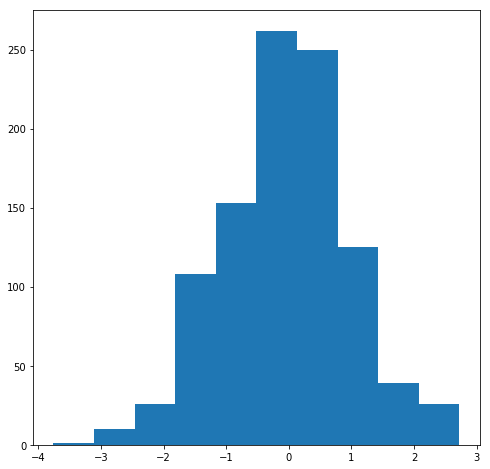

In [5]:
# Histogram seems to support approximate normality. Let's check with a Kolmogorov-Smirnov test
plt.figure(figsize=(8,8))
plt.hist(xi_draws - xi_draws.mean())

In [6]:
# Kolmogorov-Smirnov test rejects normality (small p-value).
c_xi = xi_draws - xi_draws.mean()
st.kstest(c_xi, cdf='norm')
# Let's check with an Anderson-Darling one.

KstestResult(statistic=0.05264800407115827, pvalue=0.0075380720610079615)

In [7]:
# Anderson-Darling test also rejects normality (high-test statistic).
st.anderson(c_xi)

AndersonResult(statistic=2.514190287020483, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [8]:
# Conclusion is that the variance of the xi's is the unit variance. However, their distrbution doesn't quite appear
# to be Normal. One way to improve normality is to increase n (you can change it's value in the second cell of this notebook)